In [1]:
from premise import *
import bw2data, bw2io, bw2calc
bw2data.projects.set_current("ecoinvent-3.10-cutoff")

In [2]:
scenarios = [
    #{"model": "remind", "pathway": "SSP1-NDC", "year": 2025,},
    #{"model": "remind", "pathway": "SSP1-NPi", "year": 2025,},
    #{"model": "remind", "pathway": "SSP1-PkBudg650", "year": 2025,},
    #{"model": "remind", "pathway": "SSP1-PkBudg1000", "year": 2025,},
    #{"model": "remind", "pathway": "SSP2-rollBack", "year": 2025,},
    #{"model": "remind", "pathway": "SSP2-NDC", "year": 2025,},
    #{"model": "remind", "pathway": "SSP2-NPi", "year": 2025,},
    #{"model": "remind", "pathway": "SSP2-PkBudg650", "year": 2025,},
    #{"model": "remind", "pathway": "SSP2-PkBudg1000", "year": 2025,},
    #{"model": "remind", "pathway": "SSP3-rollBack", "year": 2025,},
    #{"model": "remind", "pathway": "SSP3-NDC", "year": 2025,},
    #{"model": "remind", "pathway": "SSP3-NPi", "year": 2025,},
    #{"model": "remind-eu", "pathway": "SSP2-NDC", "year": 2025,},
    #{"model": "remind", "pathway": "SSP3-PkBudg1000", "year": 2025,},
    #{"model": "remind-eu", "pathway": "SSP2-NPi", "year": 2025,},
    #{"model": "remind-eu", "pathway": "SSP2-PkBudg650", "year": 2025,},
    #{"model": "remind-eu", "pathway": "SSP2-PkBudg1000", "year": 2025,},

    #{"model": "image", "pathway": "SSP1-L", "year": 2025,},
    #{"model": "image", "pathway": "SSP1-Ma", "year": 2025,},
    #{"model": "image", "pathway": "SSP1-VLLO", "year": 2025,},
    #{"model": "image", "pathway": "SSP2-L", "year": 2025,},
    #{"model": "image", "pathway": "SSP2-M", "year": 2025,},
    #{"model": "image", "pathway": "SSP2-VLHO", "year": 2025,},
    #{"model": "image", "pathway": "SSP5-H", "year": 2025,},
    #{"model": "image", "pathway": "SSP3-H", "year": 2025,},

    {"model": "tiam-ucl", "pathway": "SSP2-Base", "year": 2050,},
    #{"model": "tiam-ucl", "pathway": "SSP2-RCP19", "year": 2025,},
    #{"model": "tiam-ucl", "pathway": "SSP2-RCP26", "year": 2025,},
    #{"model": "tiam-ucl", "pathway": "SSP2-RCP45", "year": 2025,},
]


ndb = NewDatabase(
        scenarios = scenarios,
        source_db="ecoinvent-3.10-cutoff",
        source_version="3.10",
        key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
        biosphere_name="ecoinvent-3.10-biosphere"
)


premise v.(2, 3, 0, 'dev1')
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
| It also provides factors for hydrogen emissions to air.          |
|                                                                  |
| Within your Brightway project:                                   |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+
+-----

In [3]:
ndb.update()

Processing scenarios for all sectors:   0%|     | 0/1 [00:00<?, ?it/s]

Updating efficiency for electricity production, hard coal, supercritical in ZA from 0.2349568339188434 to 0.308880698 for region AFR.
Updating efficiency for electricity production, hard coal, supercritical in AFR from 0.30888069799999995 to 0.44 for region AFR.
Updating efficiency for electricity production, hard coal, supercritical in AUS from 0.30888069799999995 to 0.44 for region AUS.
Updating efficiency for electricity production, hard coal, supercritical in CAN from 0.30888069799999995 to 0.44 for region CAN.
Updating efficiency for electricity production, hard coal, supercritical in CHI from 0.30888069799999995 to 0.44 for region CHI.
Updating efficiency for electricity production, hard coal, supercritical in CSA from 0.30888069799999995 to 0.44 for region CSA.
Updating efficiency for electricity production, hard coal, supercritical in EEU from 0.30888069799999995 to 0.44 for region EEU.
Updating efficiency for electricity production, hard coal, supercritical in FSU from 0.30888

Processing scenarios for all sectors: 100%|█| 1/1 [01:18<00:00, 78.15s

Done!



In [4]:
ndb.write_db_to_brightway("new tiam 4")

Write new database(s) to Brightway.
Running all checks...
Minor anomalies found: check the change report.


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:29


Title: Writing activities to SQLite3 database:
  Started: 08/01/2025 17:23:59
  Finished: 08/01/2025 17:24:29
  Total time elapsed: 00:00:29
  CPU %: 94.60
  Memory %: 10.99
Created database: new tiam 4
Generate scenario report.
Report saved under /Users/romain/GitHub/premise/dev/export/scenario_report.
Generate change report.
Report saved under /Users/romain/GitHub/premise/dev/export/change reports/.


In [5]:
from premise.activity_maps import mapping_to_dataframe
df=mapping_to_dataframe(ndb.scenarios[0], ndb.database)

In [6]:
df.to_excel("mapping.xlsx")

<Axes: >

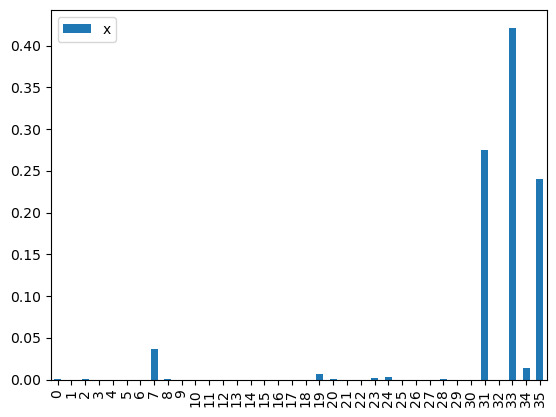

In [14]:
ndb.scenarios[0]["iam data"].electricity_mix.sel(region="WEU", year=2050).to_dataframe("x").reset_index().plot(y="x", kind="bar")

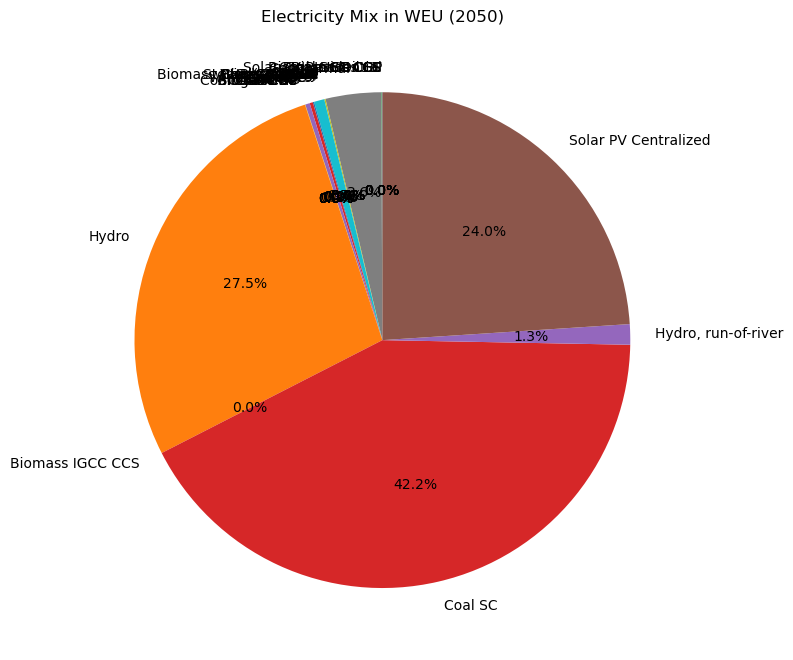

In [15]:
import matplotlib.pyplot as plt

# Extract the DataArray
da = ndb.scenarios[0]["iam data"].electricity_mix.sel(region="WEU", year=2050)

# Convert to pandas Series for convenience
series = da.to_series()

# Drop zero or NaN values if needed
series = series[series > 0].dropna()

# Plot
plt.figure(figsize=(8, 8))
series.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hide y-label
plt.title('Electricity Mix in WEU (2050)')
plt.tight_layout()
plt.show()


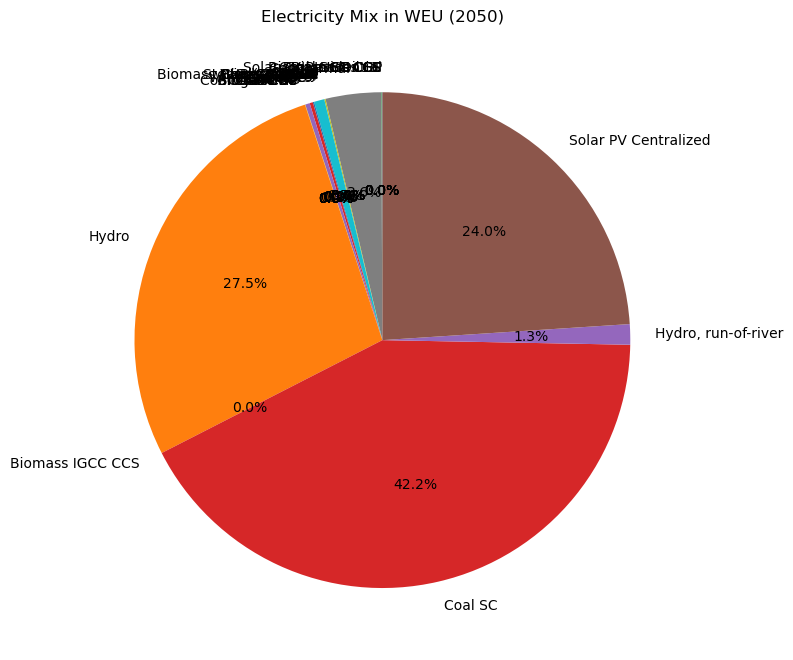

In [17]:
import matplotlib.pyplot as plt

# Extract the DataArray
da = ndb.scenarios[0]["iam data"].production_volumes.sel(
    region="WEU",
    year=2050,
    variables=ndb.scenarios[0]["iam data"].electricity_mix.coords["variables"].values
)

# Convert to pandas Series for convenience
series = da.to_series()

# Drop zero or NaN values if needed
series = series[series > 0].dropna()

# Plot
plt.figure(figsize=(8, 8))
series.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hide y-label
plt.title('Electricity Mix in WEU (2050)')
plt.tight_layout()
plt.show()
